# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | beyneu
Processing Record 3 of Set 1 | nayoro
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | afaahiti
Processing Record 13 of Set 1 | gunjur
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | sinabang
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | petropavlovsk-kamchatsky
Processing Record 23 of 

Processing Record 39 of Set 4 | margate
Processing Record 40 of Set 4 | fale old settlement
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | midar
Processing Record 43 of Set 4 | hawaiian paradise park
Processing Record 44 of Set 4 | adam
Processing Record 45 of Set 4 | minas de marcona
Processing Record 46 of Set 4 | queenstown
Processing Record 47 of Set 4 | monrovia
Processing Record 48 of Set 4 | sao geraldo do araguaia
Processing Record 49 of Set 4 | toledo
Processing Record 0 of Set 5 | quezon
Processing Record 1 of Set 5 | la passe
Processing Record 2 of Set 5 | yangor
City not found. Skipping...
Processing Record 3 of Set 5 | somerset east
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | tazacorte
Processing Record 6 of Set 5 | kachkanar
Processing Record 7 of Set 5 | st. john's
Processing Record 8 of Set 5 | tumpat
Processing Record 9 of Set 5 | ta`u
Processing Record 10 of Set 5 | yeppoon
Processing Record 11 of Set 5 | pryamitsy

Processing Record 31 of Set 8 | kilindoni
Processing Record 32 of Set 8 | vecindario
City not found. Skipping...
Processing Record 33 of Set 8 | rethymno
Processing Record 34 of Set 8 | horqueta
Processing Record 35 of Set 8 | tabou
Processing Record 36 of Set 8 | bangassou
Processing Record 37 of Set 8 | arteche
Processing Record 38 of Set 8 | bozeman
Processing Record 39 of Set 8 | slobodskoy
Processing Record 40 of Set 8 | arawa
Processing Record 41 of Set 8 | aswan
Processing Record 42 of Set 8 | manta
Processing Record 43 of Set 8 | caleta de carquin
Processing Record 44 of Set 8 | tromso
Processing Record 45 of Set 8 | letlhakeng
Processing Record 46 of Set 8 | egilsstadir
Processing Record 47 of Set 8 | gornozavodsk
Processing Record 48 of Set 8 | kone
Processing Record 49 of Set 8 | goondiwindi
Processing Record 0 of Set 9 | haiku-pauwela
Processing Record 1 of Set 9 | siwa oasis
Processing Record 2 of Set 9 | holualoa
Processing Record 3 of Set 9 | kodinsk
Processing Record 4 

Processing Record 21 of Set 12 | san mariano
Processing Record 22 of Set 12 | sao joao da barra
Processing Record 23 of Set 12 | wanning
Processing Record 24 of Set 12 | mbekenyera
Processing Record 25 of Set 12 | sansanne-mango
Processing Record 26 of Set 12 | mariental
Processing Record 27 of Set 12 | cidreira
Processing Record 28 of Set 12 | tinajo
Processing Record 29 of Set 12 | vadso
Processing Record 30 of Set 12 | xining
Processing Record 31 of Set 12 | avallon
Processing Record 32 of Set 12 | karratha
Processing Record 33 of Set 12 | acajutla
Processing Record 34 of Set 12 | deqen
Processing Record 35 of Set 12 | san patricio
Processing Record 36 of Set 12 | bereznik
Processing Record 37 of Set 12 | port douglas
Processing Record 38 of Set 12 | jaltenango de la paz
Processing Record 39 of Set 12 | salinopolis
Processing Record 40 of Set 12 | howrah
Processing Record 41 of Set 12 | padang
Processing Record 42 of Set 12 | marsh harbour
-----------------------------
Data Retrieva

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,richards bay,-28.7830,32.0377,303.41,61,0,5.67,ZA,1709891771
1,beyneu,45.3167,55.2000,279.24,81,100,3.46,KZ,1709891916
2,nayoro,44.3506,142.4578,262.55,93,81,0.82,JP,1709891916
3,talnakh,69.4865,88.3972,253.82,96,100,1.80,RU,1709891916
4,udachny,66.4167,112.4000,262.29,85,100,2.18,RU,1709891917


In [21]:
# Export the City_Data into a csv
csv_path = "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\cities.csv"
city_data_df.to_csv(csv_path, index_label="City_ID")

In [22]:
# Read saved data
csv_path = "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\cities.csv"
city_data_df = pd.read_csv(csv_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,303.41,61,0,5.67,ZA,1709891771
1,beyneu,45.3167,55.2000,279.24,81,100,3.46,KZ,1709891916
2,nayoro,44.3506,142.4578,262.55,93,81,0.82,JP,1709891916
3,talnakh,69.4865,88.3972,253.82,96,100,1.80,RU,1709891916
4,udachny,66.4167,112.4000,262.29,85,100,2.18,RU,1709891917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

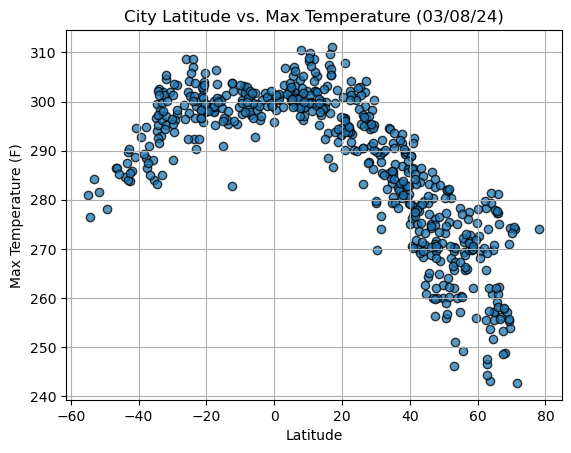

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure to the same directory
plt.savefig("C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

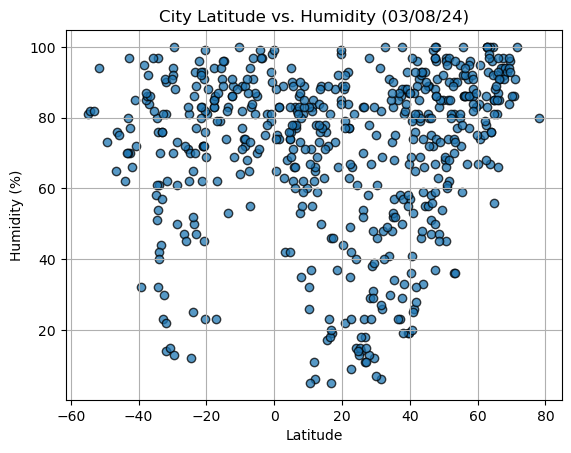

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure to the same directory
plt.savefig("C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

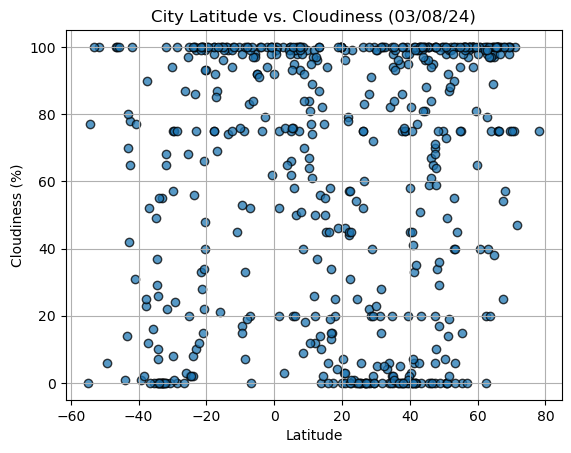

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure to the same directory
plt.savefig("C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

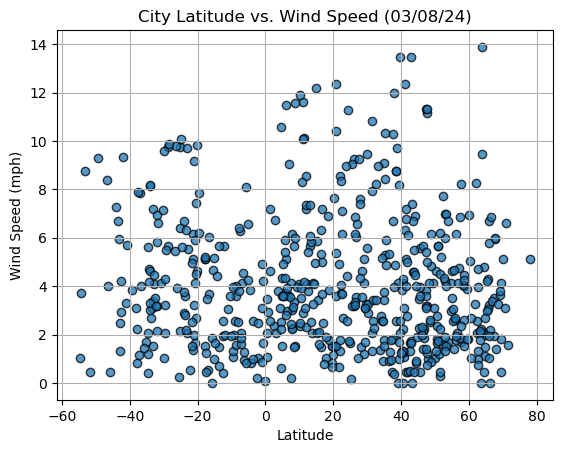

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure to the same directory
plt.savefig("C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, fig_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Display the r-value on the graph
    plt.annotate(f"R-value = {round(rvalue, 2)}", (max(x_values), min(y_values)), fontsize=12, color='blue')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()

    # Save the figure
    plt.savefig(fig_name)

    # Show plot
    plt.show()

    # Print the r-value
    print(f"R-value: {round(rvalue, 2)}")

    # Return the regression line equation
    return line_eq

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beyneu,45.3167,55.2000,279.24,81,100,3.46,KZ,1709891916
2,nayoro,44.3506,142.4578,262.55,93,81,0.82,JP,1709891916
3,talnakh,69.4865,88.3972,253.82,96,100,1.80,RU,1709891916
4,udachny,66.4167,112.4000,262.29,85,100,2.18,RU,1709891917
6,nuuk,64.1835,-51.7216,260.71,96,100,2.10,GL,1709891841


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,303.41,61,0,5.67,ZA,1709891771
5,ushuaia,-54.8000,-68.3000,280.96,81,0,1.03,AR,1709891748
7,papatowai,-46.5619,169.4708,286.51,65,100,8.40,NZ,1709891918
8,port-aux-francais,-49.3500,70.2167,278.20,73,6,9.30,TF,1709891855
9,chonchi,-42.6128,-73.8092,283.71,70,78,4.22,CL,1709891918


###  Temperature vs. Latitude Linear Regression Plot

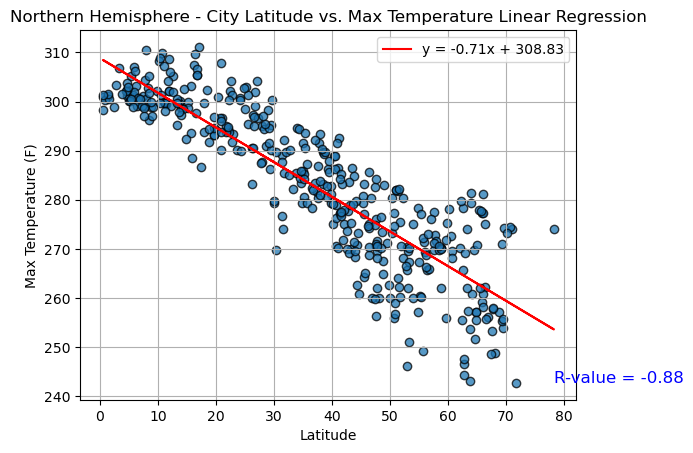

R-value: -0.88


'y = -0.71x + 308.83'

In [33]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                       "Latitude", "Max Temperature (F)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig6.png")

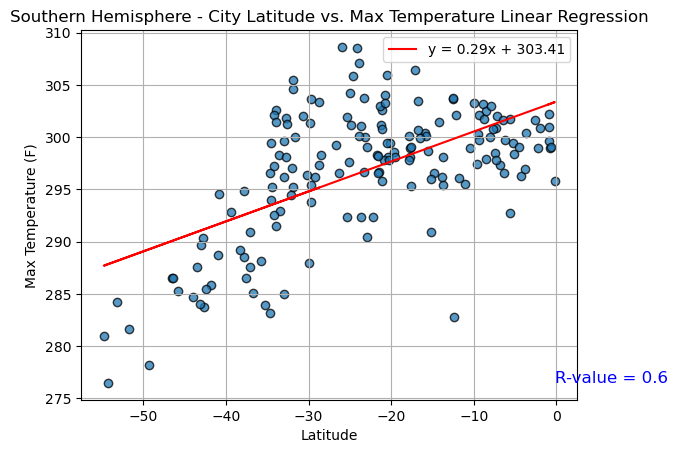

R-value: 0.6


'y = 0.29x + 303.41'

In [34]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                       "Latitude", "Max Temperature (F)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig7.png")

**Discussion about the linear relationship:** For the northern hemisphere, there is a negative linear relationship between the latitude versus maximum tempreture. The regression line has a negative slope, as shown by the equation y = -0.71x + 308.83 and an R value of -0.88. This means that as you move away from the equator towards the North Pole (increasing Latitude), the maximum tempreture tends to decrease. The relatively high absolute value of the R value suggests a strong negative correlation between latitude and maximum tempreture in the Northern Hemisphere.

In Contrast, the Southern Hemisphere shows a positive linear relationship between latitude and maximum tempreture, indicated by the positive slope in the regression lines equation y = 0.28x + 303.41 and an R value of 0.6. This implies that as the latitude increases (moving away from the South Pole towards the equator), the maximum temperature tends to increase. The R value is lower in absolute terms compared to the Northern Hemisphere, suggesting that while there is a positive correlation, it may not be as strong as the correlation in the Northern Hemisphere.

In both hemispheres, the latitude is a significant predictor of maximum temperature, with the direction of the effect being opposite due to the geographical positions relative to the equator. The strength of the relationship is stronger in the Northern Hemisphere compared to the Southern Hemisphere based on the R values provided.

### Humidity vs. Latitude Linear Regression Plot

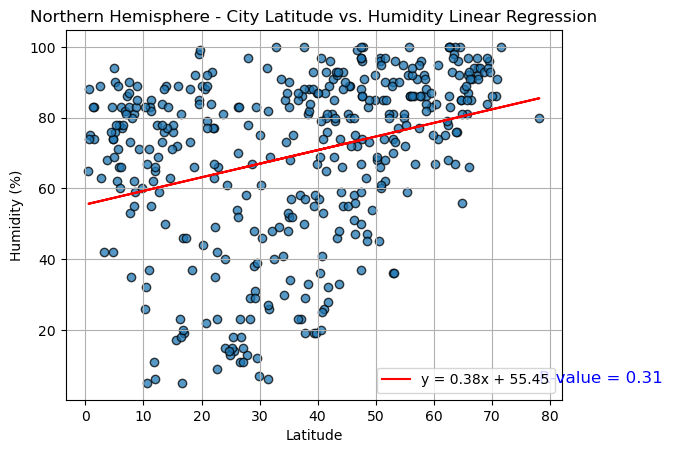

R-value: 0.31


'y = 0.38x + 55.45'

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - City Latitude vs. Humidity Linear Regression",
                       "Latitude", "Humidity (%)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig8.png")

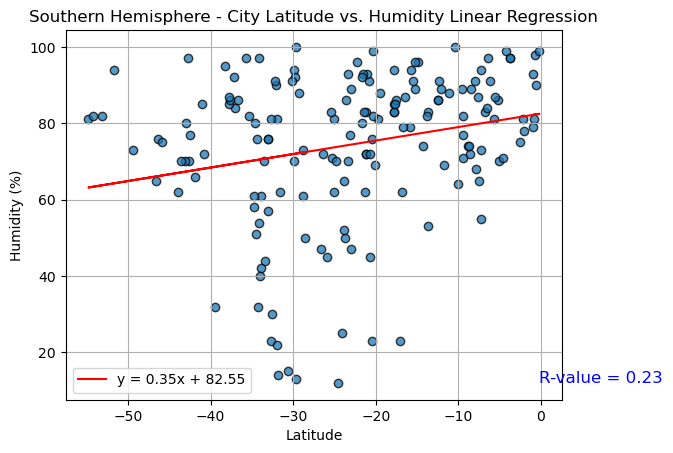

R-value: 0.23


'y = 0.35x + 82.55'

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - City Latitude vs. Humidity Linear Regression",
                       "Latitude", "Humidity (%)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig9.png")

**Discussion about the linear relationship:** For the Northern Hemisphere, the plot shows a slight positive linear relationship between latitude and humidity, as indicated by the regression line equation y=0.38x+55.45 with an R value of 0.31. This suggests that as one moves northward away from the equator, there is a small tendency for humidity to increase. However, the R value of 0.31 indicates a weak correlation between the two variables.

Turning to the Southern Hemisphere, the scatter plot shows an even weaker positive relationship between latitude and humidity, with a regression line equation of y=0.35x+82.57 and an R value of 0.23. This implies that as the latitude moves closer to the equator (increasing from negative to zero), there might be a slight increase in humidity. Again, the low R value here suggests that the correlation is weak.

In summary, while both hemispheres exhibit a positive relationship between city latitude and humidity, the relationships are weak as indicated by the low R values. This implies that other factors aside from latitude likely play a more significant role in determining humidity levels in both the Northern and Southern Hemispheres. The data does not suggest a strong dependence of humidity on latitude within the ranges presented in these plots.

### Cloudiness vs. Latitude Linear Regression Plot

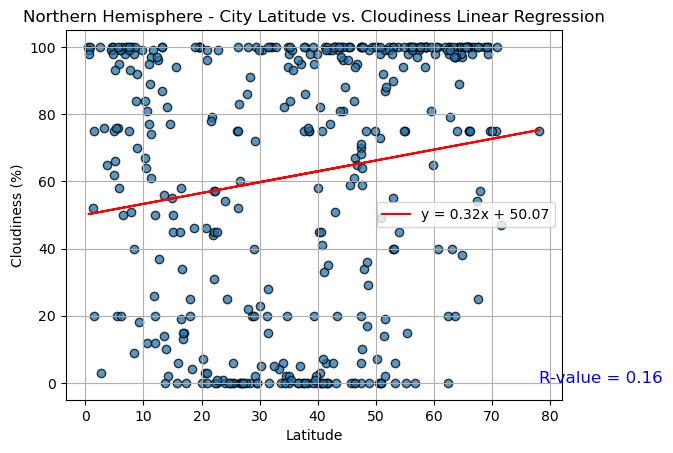

R-value: 0.16


'y = 0.32x + 50.07'

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression",
                       "Latitude", "Cloudiness (%)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig10.png")

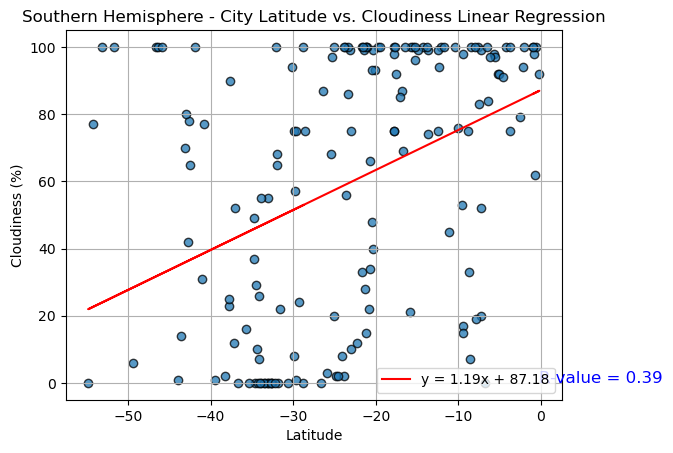

R-value: 0.39


'y = 1.19x + 87.18'

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression",
                       "Latitude", "Cloudiness (%)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig11.png")

**Discussion about the linear relationship:** 
​
Adam Faisal (Student)
​
For the Northern Hemisphere, the regression line is y=0.32x+50.07 with an R value of 0.16. This shows a very slight positive relationship, indicating that as one moves northward from the equator, there is a minor increase in cloudiness. However, the low R value suggests that this is a weak relationship and that latitude is not a strong predictor of cloudiness in the Northern Hemisphere.

In the Southern Hemisphere, the regression line equation is y=1.19x+87.18 with an R value of 0.39. This shows a moderate positive relationship between latitude and cloudiness, suggesting that cloudiness tends to increase as one moves towards the equator from the South Pole. The R value is higher than that of the Northern Hemisphere, indicating a stronger relationship between the two variables in the Southern Hemisphere, though it is still not particularly strong.

Summarizing the findings from both hemispheres, it appears that there is a slight to moderate positive relationship between latitude and cloudiness, with the relationship being somewhat stronger in the Southern Hemisphere than in the Northern Hemisphere. It is important to note, however, that other factors not considered in these plots could also influence cloudiness, such as local weather patterns, humidity, and geographic features. The relationships indicated by the R values are not strong, meaning that while there is some tendency for cloudiness to increase with latitude in these hemispheres, it is not a definitive predictor.

### Wind Speed vs. Latitude Linear Regression Plot

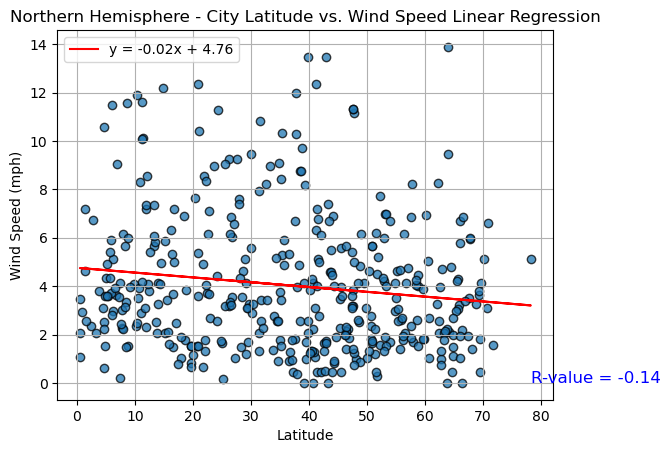

R-value: -0.14


'y = -0.02x + 4.76'

In [39]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression",
                       "Latitude", "Wind Speed (mph)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig12.png")

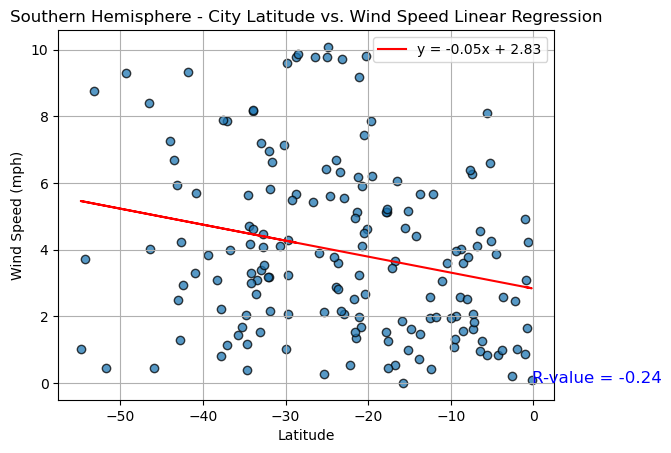

R-value: -0.24


'y = -0.05x + 2.83'

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression",
                       "Latitude", "Wind Speed (mph)",
                       "C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\Fig13.png")

**Discussion about the linear relationship:** For the Northern Hemisphere, the regression line equation is y=−0.02x+4.76 with an R value of -0.14. This indicates a very slight negative relationship between latitude and wind speed, suggesting that wind speed decreases minimally as one moves northward from the equator. However, the R value of -0.14 indicates that this relationship is extremely weak, and that latitude is not a strong predictor of wind speed in the Northern Hemisphere.

In the Southern Hemisphere, the scatter plot shows a regression line with the equation y=−0.05x+2.83 and an R value of -0.24. This suggests a slightly stronger, but still weak, negative relationship between latitude and wind speed compared to the Northern Hemisphere. It indicates that wind speed may decrease as one moves further away from the equator towards the South Pole, but again the relationship is not strong.

Overall, in both hemispheres, there is a very weak negative relationship between city latitude and wind speed. The R values close to zero suggest that other factors likely have a much more significant impact on wind speed than latitude. These factors could include geographic features, atmospheric pressure differences, and local weather systems, which are not accounted for simply by looking at latitude